In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
import scipy.optimize as spo

In [2]:
# Data observer frame
data = pd.read_excel('ngc_5548.xlsx')
wave_obs = np.array(data.spectral_axis)
flux_den_obs = np.array(data.intensity)

In [3]:
# Constants 
z = 0.01717 # redshift
dis_src = 75.01 # Mpc
dis_src = dis_src *  3.08567758e24 # cm
print(dis_src)
c = 3* 10**8 #m/s
f = 3/4
G = 6.6743 * (10**-11) #m^3/kg/s^2

2.314566752758e+26


In [4]:
wave_src = wave_obs/(1+z) #Angstrom
flux_den_src = flux_den_obs*(1+z) #erg/cm^2/s/A
lum_src = (flux_den_src * 4 * np.pi * dis_src**2) *wave_src #erg/s

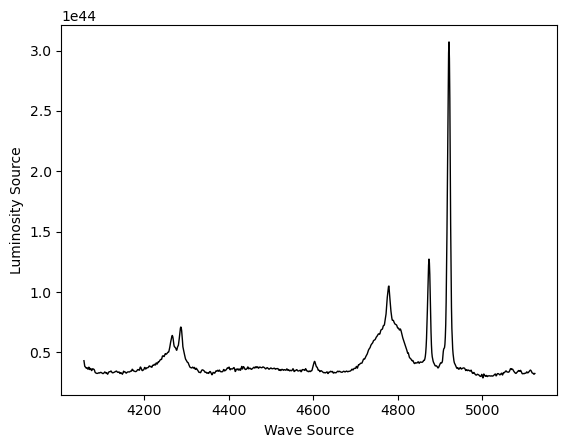

In [5]:
#ploting
plt.plot(wave_src, lum_src, "black", linewidth=1)
plt.xlabel("Wave Source")
plt.ylabel("Luminosity Source")
plt.show()

In [6]:
wave_src[700:1100]

array([4734.29220288, 4735.25566031, 4736.22894895, 4737.19240638,
       4738.15586382, 4739.12915245, 4740.09260989, 4741.05606732,
       4742.02935596, 4742.99281339, 4743.95627083, 4744.92955946,
       4745.8930169 , 4746.85647434, 4747.82976297, 4748.79322041,
       4749.75667784, 4750.72996648, 4751.69342391, 4752.65688135,
       4753.63016998, 4754.59362742, 4755.55708485, 4756.53037349,
       4757.49383092, 4758.45728836, 4759.43057699, 4760.39403443,
       4761.35749186, 4762.3307805 , 4763.29423793, 4764.25769537,
       4765.230984  , 4766.19444144, 4767.15789888, 4768.13118751,
       4769.09464495, 4770.05810238, 4771.03139102, 4771.99484845,
       4772.95830589, 4773.93159452, 4774.89505196, 4775.85850939,
       4776.83179803, 4777.79525546, 4778.7587129 , 4779.73200153,
       4780.69545897, 4781.65891641, 4782.63220504, 4783.59566248,
       4784.55911991, 4785.53240855, 4786.49586598, 4787.45932342,
       4788.43261205, 4789.39606949, 4790.35952692, 4791.33281

In [7]:
lum_src[700:1100]

array([5.40814849e+43, 5.51959295e+43, 5.60128887e+43, 5.66179118e+43,
       5.70369401e+43, 5.73881042e+43, 5.78632798e+43, 5.85357075e+43,
       5.95270753e+43, 5.99341076e+43, 6.01447659e+43, 6.03332105e+43,
       6.05735993e+43, 6.10994738e+43, 6.18201035e+43, 6.26043046e+43,
       6.30125072e+43, 6.34499545e+43, 6.40459038e+43, 6.47420015e+43,
       6.51842859e+43, 6.53869842e+43, 6.53946981e+43, 6.50439365e+43,
       6.54793191e+43, 6.68125714e+43, 6.80731692e+43, 6.87216248e+43,
       6.89891941e+43, 6.91448276e+43, 6.93568042e+43, 7.03502072e+43,
       7.18398143e+43, 7.22877630e+43, 7.23062928e+43, 7.29698224e+43,
       7.51876206e+43, 7.73239963e+43, 7.93388783e+43, 8.18497924e+43,
       8.67577519e+43, 9.15436517e+43, 9.56306027e+43, 9.85997546e+43,
       1.02097921e+44, 1.04628544e+44, 1.04978185e+44, 1.00899802e+44,
       9.66732185e+43, 9.21551454e+43, 8.75528941e+43, 8.40908102e+43,
       8.12059206e+43, 7.88397514e+43, 7.69391911e+43, 7.65350563e+43,
      

In [8]:
print(wave_src)
print(lum_src)

[4057.55183499 4058.51529243 4059.47874986 ... 5121.96584642 5122.93913505
 5123.90259249]
[4.31389215e+43 4.09939437e+43 3.85179808e+43 ... 3.19653158e+43
 3.21803627e+43 3.25926497e+43]


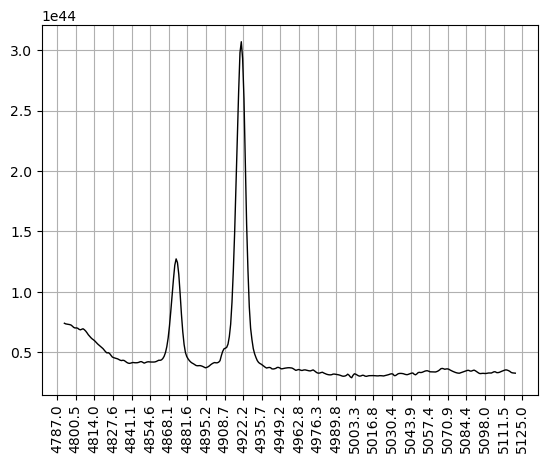

In [9]:
plt.plot(wave_src[760:1100], lum_src[760:1100], "black", linewidth=1)
plt.grid()
plt.xticks(np.linspace(4787,5125, 26), rotation = 90)
plt.show()

In [10]:
X = wave_src[760:1100]
Y = lum_src[760:1100]

In [11]:
def model(x, amp1, mu1, sig1, c1,
          amp2, mu2, sig2, c2,
          amp3, mu3, sig3, c3,
          amp4, mu4, sig4, c4):
    
    func_val1 = c1 + amp1 * np.exp(-np.power(x - mu1, 2.)/(2 * np.power(sig1, 2.))) #HbetaNarrow
    func_val2 = c2 + amp2 * np.exp(-np.power(x - mu2, 2.)/(2 * np.power(sig2, 2.))) #Hbetabroad
    func_val3 = c3 + amp3 * np.exp(-np.power(x - mu3, 2.)/(2 * np.power(sig3, 2.))) #O[III]Narrow
    func_val4 = c4 + amp4 * np.exp(-np.power(x - mu4, 2.)/(2 * np.power(sig4, 2.))) #O[III]Broad
    
    return func_val1 + func_val2 + func_val3 + func_val4 - c2 - c3 - c4   

In [57]:
#curve fitting

def gaussian(x, amp, mu, sig, c):
    func_val = c + amp * np.exp(-np.power(x - mu, 2.)/(2 * np.power(sig, 2.)))
    return func_val

initial_guess = [
                0.6*(10**44), 4875, 3, 0.4*(10**44),  #HalphaNarrow: amp1, mu1, sig1, c1
                0.3*(10**44), 4870, 8, 0.4*(10**44),  #Halphabroad: amp2, mu2, sig2, c2
                1.7*(10**44), 4922, 5, 0.3*(10**44), #O[III]Narrow: amp3, mu3, sig3, c3
                1.1*(10**44), 4920, 10, 0.3*(10**44), #O[III]Broad: amp4, mu4, sig4, c4
            ]
bund = (
        (0.4*(10**44), 4870, 2, 0.3*(10**44),  #lower: HalphaNarrow: amp1, mu1, sig1, c1
        0.1*(10**44), 4865, 5, 0.3*(10**44), #lower: Halphabroad: amp2, mu2, sig2, c2
        1.0*(10**44), 4915, 3, 0.2*(10**44), #lower: O[III]Narrow: amp3, mu3, sig3, c3
        0.9*(10**44), 4915, 5, 0.2*(10**44),  #lower: O[III]Broad: amp4, mu4, sig4, c4
        ), #All lower in a tuple
        
        (0.8*(10**44), 4880, 5, 0.6*(10**44), #upper: HalphaNarrow: amp1, mu1, sig1, c1
        0.5*(10**44), 4875, 10, 0.6*(10**44),  #upper: Halphabroad: amp2, mu2, sig2, c2
        2.0*(10**44), 4925, 8, 0.5*(10**44), #upper: O[III]Narrow: amp3, mu3, sig3, c3
        1.5*(10**44), 4925, 15, 0.5*(10**44),  #upper: O[III]Broad: amp4, mu4, sig4, c4
        ) #All upper in a tuple
        
    )

popt, pcov = spo.curve_fit(model, X, Y, p0 = initial_guess, bounds = bund)
print(popt)
yfit = model(X, *popt)
yfit1 = gaussian(X, *popt[0:4])
yfit2 = gaussian(X, *popt[4:8])
yfit3 = gaussian(X, *popt[8:12])
yfit4 = gaussian(X, *popt[12:16])

[6.00000000e+43 4.87486228e+03 2.97872940e+00 4.00000000e+43
 3.00000000e+43 4.87000276e+03 7.96125957e+00 4.00000000e+43
 1.70000000e+44 4.92074273e+03 3.56336605e+00 3.00000000e+43
 1.10000000e+44 4.91973397e+03 8.76199310e+00 3.00000000e+43]


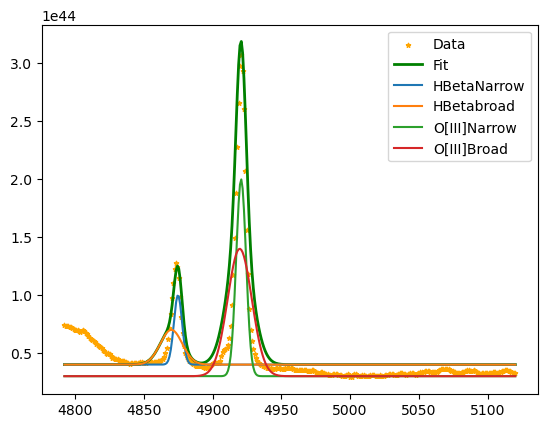

In [58]:
plt.scatter(X, Y, s=10, c='Orange', marker='*', label = "Data")
plt.plot(X, yfit, "green", linewidth=2, label = "Fit")
plt.plot(X, yfit1, label = "HBetaNarrow")
plt.plot(X, yfit2, label = "HBetabroad")
plt.plot(X, yfit3, label = "O[III]Narrow")
plt.plot(X, yfit4, label = "O[III]Broad")
plt.legend()
plt.show()

In [59]:

#Finding values
lum_5100 = gaussian(5100, *popt[8:12]) #erg/s
print("O[III](5100)",lum_5100)
FWHM = 2.3548*popt[6] #need to correct for func2 
print("FWHM1",FWHM)
V = (c*FWHM)/4863 #m/s
R = 2.59* 10**13 * 10**(1.527 + (0.533*np.log10((lum_5100/(10**44))))) #m


M_BH = f * ((R*V**2)/G) #kg
M_BH = (M_BH/(1.989*10**30)) #Solar mass
print("Mass of BH:",M_BH)

O[III](5100) 3e+43
FWHM1 18.747174025888214
Mass of BH: 3466823.577486503


In [60]:
#Error in mass

E_mass = 6.5*10**7 - M_BH
print("Containing Error in Mass",E_mass)

Containing Error in Mass 61533176.4225135
